## Context
The dataset is from the city of Melbourne and contains the different attributes of the properties there and the locations in which they are located. The aim is to perform a detailed analysis of this dataset and provide useful insights to facilitate the process of buying and selling real estate.

## Data Description:

The detailed data dictionary is given below:

* Suburb - Suburb in which the property is located
* Rooms - Number of rooms in the property
* Type - Type of the property like
    * h - house,cottage,villa, semi,terrace,
    * t - townhouse,
    * u - unit, duplex
* SellerG - Name of the real estate agent who sold the property
* Date - Date on which the property was sold
* Distance - Distance of the property from CBD in kilometres. CBD is the central business district of the city.
* Postcode - Postcode of the area
* Bedroom - Number of bedrooms in the property
* Bathroom - Number of bathrooms in the property
* Car - Number of car parking spaces in the property
* Landsize - Size of the land in square metres
* BuildingArea - Size of the building in square metres (Generally, building size is smaller than land size since someone can have personal gardens and other things in the property.)
* YearBuilt - Year in which the building was built
* Regionname - Name of the region in which the property is located like Eastern Metropolitan, Western Metropolitan, Northern Victoria etc.
* Propertycount - Number of properties that are present in the suburb
* Price - price (in AUD) at which the property was sold

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
data = pd.read_csv('Melbourne_Housing.csv')

In [3]:
# checking the top 5 rows of the dataframe
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.5,3042.0,3.0,2.0,1.0,303.0,225,2016.0,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.3,3206.0,2.0,1.0,0.0,120.0,82,1900.0,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.3,3206.0,2.0,1.0,0.0,159.0,inf,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.4,3078.0,3.0,2.0,4.0,853.0,263,1930.0,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.4,3078.0,3.0,2.0,2.0,208.0,inf,2013.0,Northern Metropolitan,2211,1110000


In [4]:
# checking the last 5 rows of the dataframe
data.tail()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
27109,Noble Park,3,h,C21,30-09-2017,22.7,3174.0,3.0,1.0,6.0,569.0,130,1959.0,South-Eastern Metropolitan,11806,627500
27110,Reservoir,3,u,RW,30-09-2017,12.0,3073.0,3.0,1.0,1.0,NaN,105,1990.0,Northern Metropolitan,21650,475000
27111,Roxburgh Park,4,h,Raine,30-09-2017,20.6,3064.0,4.0,2.0,2.0,NaN,225,1995.0,Northern Metropolitan,5833,591000
27112,Springvale South,3,h,Harcourts,30-09-2017,22.2,3172.0,3.0,2.0,1.0,544.0,NaN,NaN,South-Eastern Metropolitan,4054,780500
27113,Westmeadows,4,h,Barry,30-09-2017,16.5,3049.0,4.0,2.0,6.0,813.0,140,1960.0,Northern Metropolitan,2474,791000


In [5]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 27114 rows and 16 columns.


In [6]:
# checking the basic info of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


* There are 10 numerical columns in the data and 6 object type columns.
* Date column is being read as object type column but it should be in date-time format.
* BuildingArea is read as object type column but it should be a numerical column.

In [8]:
# changing the data type of Date column
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)

In [9]:
# checking the unique values of buildinarea column
data['BuildingArea'].unique()

array(['225', '82', 'inf', '263', '242', '251', '117', 'missing', '76',
       '399', '118', '103', '180', '123', '218', '129', '167', '154',
       '275', '121', nan, '125', '255', '75', '156', '240', '268', '108',
       '69', '140', '214', '253', '189', '215', '96', '104', '100', '313',
       '144', '93', '110', '70', '122', '51', '147', '113', '83', '56',
       '137', '85', '64', '175', '3558', '170', '265', '353', '138', '19',
       '116', '87', '74', '320', '300', '210', '120', '86', '97', '200',
       '106', '14', '161', '128', '185', '146', '133', '115', '143',
       '150', '195', '236', '276', '188', '179', '249', '141', '34', '73',
       '107', '84', '81', '207', '50', '264', '312', '235', '221', '183',
       '132', '160', '186', '78', '105', '145', '62', '220', '315', '181',
       '61', '112', '420', '226', '266', '410', '449', '356', '477',
       '250', '95', '190', '284', '247', '213', '209', '119', '111',
       '130', '348', '166', '44', '176', '98', '159', '79'

In [10]:
# checking the count of different data types in BuildingArea column
data['BuildingArea'].apply(type).value_counts()

,count
BuildingArea,
<class 'float'>,16571
<class 'str'>,10543


* We can see that there are mixed data type values in the column like - 'missing', 'inf' which should actually be read as missing values (NaN). Let's replace such data points with null values.


In [11]:
# replacing values with nan
data['BuildingArea'] = data['BuildingArea'].replace(['missing','inf'],np.nan)

# changing the data type to float
data['BuildingArea'] = data['BuildingArea'].astype(float)

In [12]:
# checking the data type of columns again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

* We see that the data types of Date and BuildingArea columns have been fixed.
* There are 11 numerical columns, 4 object type columns, and 1 date time column in the data.
* We observe that some columns have less entries that other columns (less than 27114 rows) which indicates the presence of missing values in the data.

In [13]:
# checking the number of missing values
data.isnull().sum()

,0
Suburb,0
Rooms,0
Type,0
SellerG,0
Date,0
Distance,1
Postcode,1
Bedroom,6436
Bathroom,6442
Car,6817


* There are missing values in 8 columns of the data.
* We will treat these missing values after understanding the distributions of features in the data, the relationships that exist in the data. This will help us impute these values more effectively.

In [14]:
# checking the duplicated rows
data.duplicated().sum()

np.int64(11)

* There are 11 duplicate entries in the data. Let's remove them.

In [15]:
# dropping duplicate entries from the data
data.drop_duplicates(inplace=True)

# resetting the index of data frame since some rows will be removed
data.reset_index(drop=True,inplace=True)

In [16]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Rooms,27103.0,2.992473,1.0,2.0,3.0,4.0,16.0,0.954667
Date,27103,2017-05-23 12:25:09.441759488,2016-01-28 00:00:00,2016-11-19 00:00:00,2017-07-08 00:00:00,2017-10-28 00:00:00,2018-03-17 00:00:00,NaN
Distance,27102.0,11.279931,0.0,6.4,10.5,14.0,48.1,6.783958
Postcode,27102.0,3113.787322,3000.0,3046.0,3088.0,3153.0,3978.0,111.129025
Bedroom,20678.0,3.046184,0.0,2.0,3.0,4.0,20.0,0.955024
Bathroom,20672.0,1.591525,0.0,1.0,1.0,2.0,9.0,0.701106
Car,20297.0,1.71582,0.0,1.0,2.0,2.0,18.0,0.994487
Landsize,17873.0,560.536564,50.0,220.0,513.0,664.0,76000.0,1411.309127
BuildingArea,10529.0,154.511857,11.0,101.0,133.0,183.0,6791.0,130.583872
YearBuilt,11985.0,1966.618273,1850.0,1950.0,1970.0,2000.0,2019.0,36.042


* **Rooms:** On average there are 3 rooms in a property. 75% of the properties have less than or equal to 4 rooms. There are some properties which have 16 rooms.
* **Distance:** On average the properties are located within 11.28 Kms of central business district, while the median is 10.5 Kms. There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.
* The distribution of the number of bedrooms, bathrooms, and car parking spaces is fine. The maximum values of these columns might require a quick check.
* **Landsize:** The Landsize column has a huge standard deviation with a mean and median land size of 560.53 and 513 metres respectively. Also, there is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.
* **YearBuilt:** The latest property was built in 2019 while the earliest property was built in 1850.
* **Propertycount:** On average a suburb has around 7564 properties. The column has a large standard deviation of 4494.02 units.
* **Price:** On average the house prices are AUD 1050664. The median prices are AUD 871000. There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.

In [17]:
# checking the total number of unique values in the Postcode column
data['Postcode'].nunique()

209

* There are a total of 209 different postcodes in the data.

In [18]:
# Making a list of all categorical variables
cat_cols =  ['Suburb', 'Type', 'SellerG', 'Regionname']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)

Suburb
Reservoir         724
Bentleigh East    493
Richmond          437
Preston           410
Brunswick         383
                 ... 
Darley              1
Eynesbury           1
croydon             1
Monbulk             1
viewbank            1
Name: count, Length: 345, dtype: int64
--------------------------------------------------
Type
h    18394
u     5882
t     2827
Name: count, dtype: int64
--------------------------------------------------
SellerG
Nelson           2733
Jellis           2516
Barry            2385
hockingstuart    2096
Ray              1574
                 ... 
Alex                1
Benchmark           1
Gellibrand          1
White               1
Icon                1
Name: count, Length: 347, dtype: int64
--------------------------------------------------
Regionname
Southern Metropolitan         8480
Northern Metropolitan         7809
Western Metropolitan          5792
Eastern Metropolitan          3264
South-Eastern Metropolitan    1336
Northern Victoria   

In [19]:
# Printing the percentage of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

Suburb
Reservoir         0.026713
Bentleigh East    0.018190
Richmond          0.016124
Preston           0.015127
Brunswick         0.014131
                    ...   
Darley            0.000037
Eynesbury         0.000037
croydon           0.000037
Monbulk           0.000037
viewbank          0.000037
Name: proportion, Length: 345, dtype: float64
--------------------------------------------------
Type
h    0.678670
u    0.217024
t    0.104306
Name: proportion, dtype: float64
--------------------------------------------------
SellerG
Nelson           0.100838
Jellis           0.092831
Barry            0.087998
hockingstuart    0.077335
Ray              0.058075
                   ...   
Alex             0.000037
Benchmark        0.000037
Gellibrand       0.000037
White            0.000037
Icon             0.000037
Name: proportion, Length: 347, dtype: float64
--------------------------------------------------
Regionname
Southern Metropolitan         0.312880
Northern Metropolitan      


* Highest number (724) of the properties are in Reservoir suburb followed by 493 properties in Bentleigh East suburb.
* Most of the properties (18394 or 67%) are of type 'h' that is houses/cottages/villas, etc followed by 5882 or 21% properties of type 'u' that is unit/duplex. The least number (2827 or 10%) is of type 't' that is townhouses.
* Top 5 sellers of properties are  - Nelson, Jellis, Barry, hockingstuart, and Ray.
* 31% of the properties are in Southern Metropolitan followed by 28% in Northern Metropolitan, and 21% in Western Metropolitan. This shows that our analysis will be biased towards Metropolitan regions than Victoria regions as around 98% of the data points are from Metropolitan region.

### Univariate Analysis

**Distribution for numerical columns.**

**Distance**

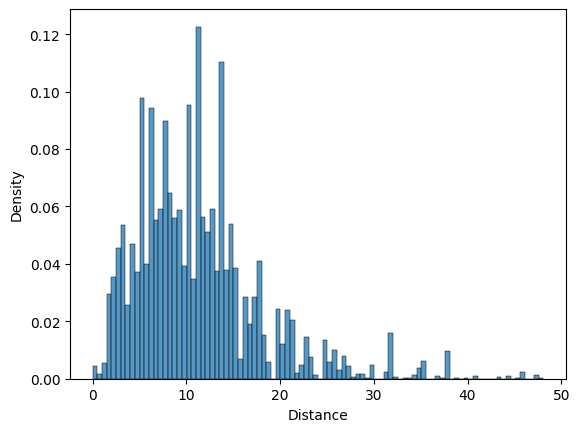

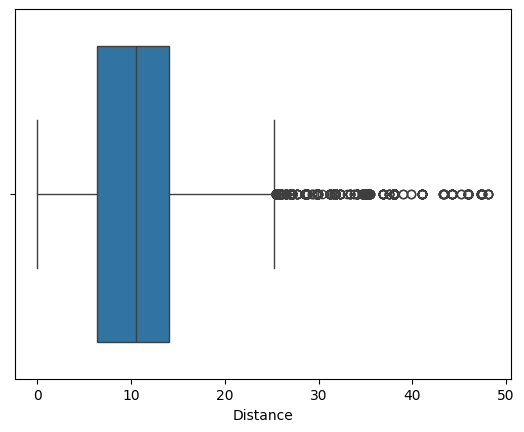

In [20]:
sns.histplot(data=data,x='Distance',stat='density')
plt.show()
sns.boxplot(data=data,x='Distance')
plt.show()

* The distribution is skewed towards right.
* There are many outliers present in this column.
* Values above 25 Kms are being represented as outliers in the boxplot, indicating there there are many properties that are atleast 25 Kms away from CBD.

**Landsize**

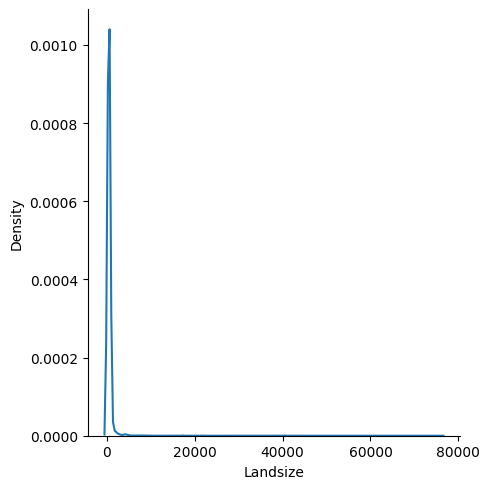

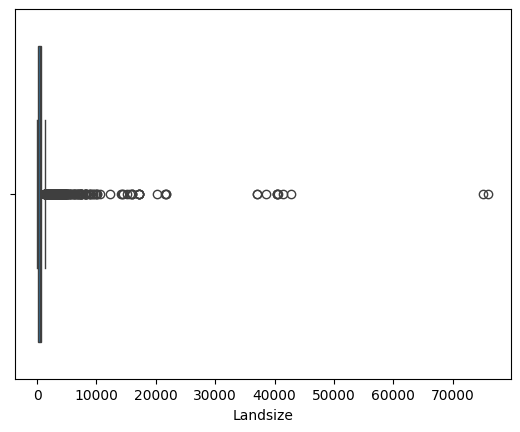

In [21]:
sns.displot(data=data,x='Landsize',kind='kde')
plt.show()
sns.boxplot(data=data,x='Landsize')
plt.show()

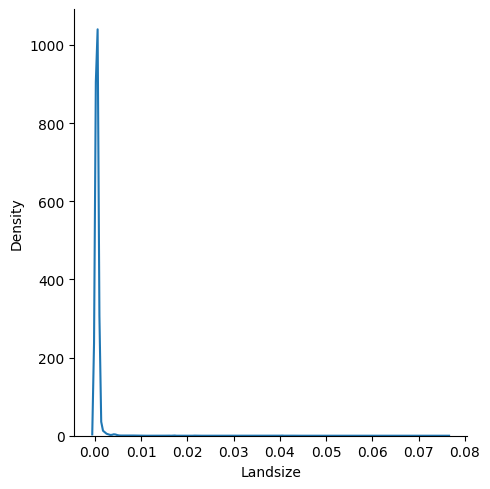

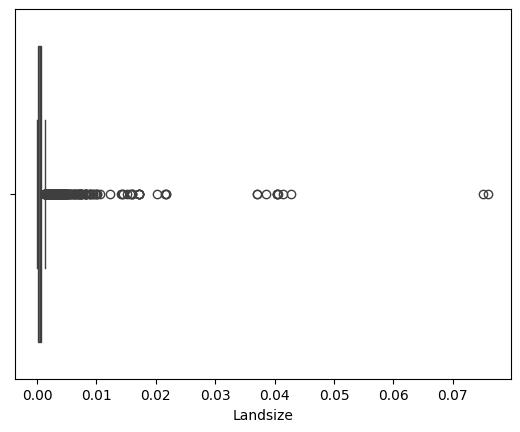

In [22]:
# converting Landsize to sq. kilometres from sq. metres
sns.displot(data=data,x=data['Landsize']/1000000,kind='kde')
plt.show()
sns.boxplot(data=data,x=data['Landsize']/1000000)
plt.show()

* The distribution is skewed towards the right, even after conversion to Kilometres.  
* There are many outliers present in this column. Some properties have a landsize of more than 60000 sq meters. These value seems to be very high and can possibly be a data entry error. We should check it further.

In [23]:
data.loc[data['Landsize']>60000]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
23897,Silvan,3,h,Harcourts,2017-05-27,34.6,3795.0,3.0,2.0,2.0,76000.0,NaN,NaN,Eastern Victoria,457,1085000
25079,Balwyn North,3,h,Kay,2016-08-28,9.2,3104.0,3.0,1.0,2.0,75100.0,NaN,NaN,Southern Metropolitan,7809,2000000


* Just by looking at these observation it is difficult to say whether these are data entry errors or not. Although the land size does look very high.

**BuildingArea**

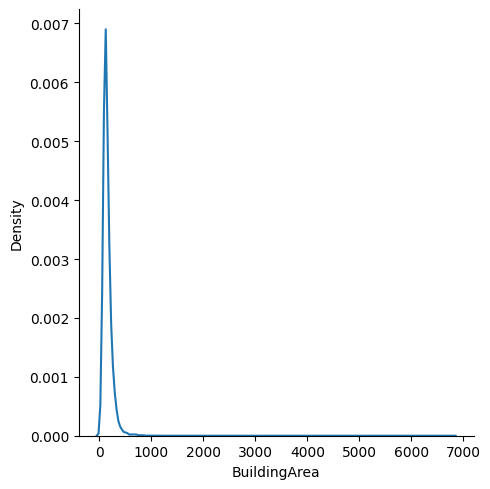

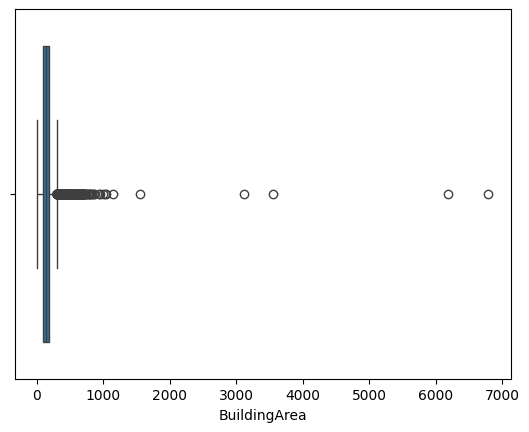

In [24]:
sns.displot(data=data,x='BuildingArea',kind='kde')
plt.show()
sns.boxplot(data=data,x='BuildingArea')
plt.show()

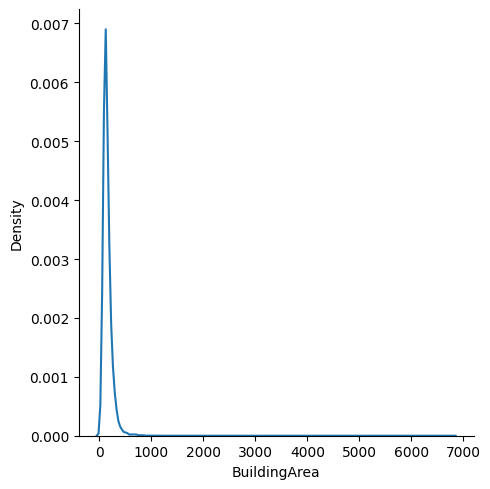

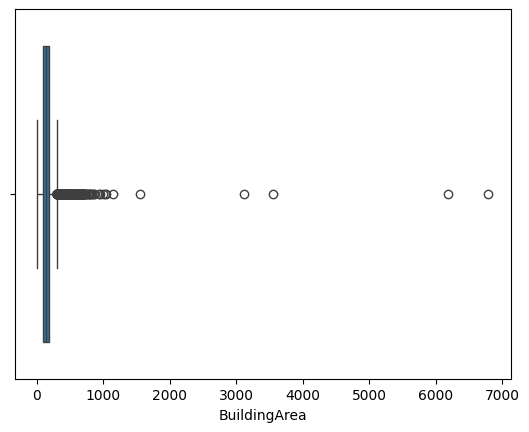

In [25]:
sns.displot(data=data,x=data['BuildingArea'],kind='kde')
plt.show()
sns.boxplot(data=data,x=data['BuildingArea'])
plt.show()

* The distribution of BuildingArea is similar to Landsize that is right skewed.
* It has many outliers. There are values above 4000 sq meters which seems high.

**Observations on Price**

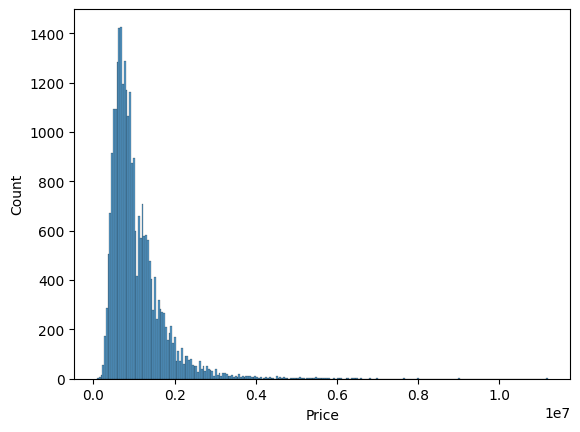

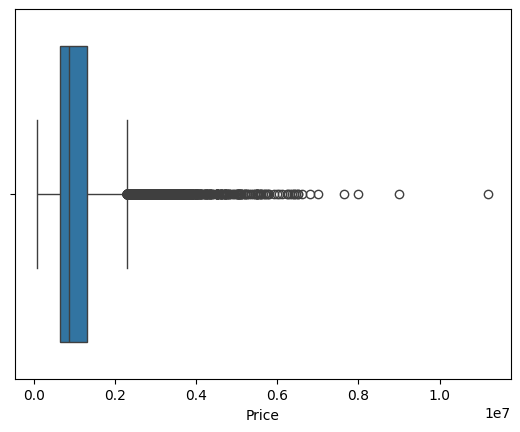

In [26]:
sns.histplot(data=data,x='Price')
plt.show()
sns.boxplot(data=data,x='Price')
plt.show()

* The distribution of the Price is skewed towards the right.
* There are many outliers in this variable and the values above 2000000 are being represented as outliers by the boxplot.
* The values seem fine as the selling price of the properties varies and depends upon various factors. For example, distance, if the properties are closer to CBD they might have a higher selling price.

**Rooms**


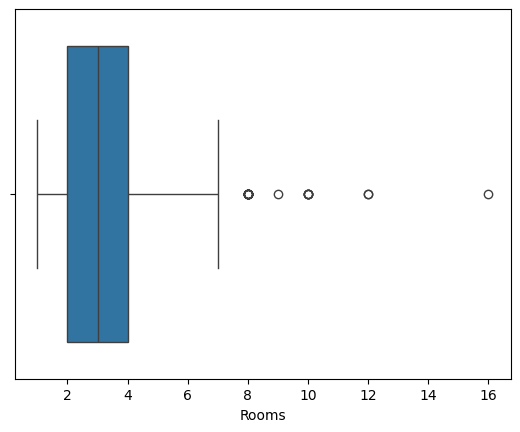

In [27]:
sns.boxplot(data=data,x='Rooms')
plt.show()

* Properties with more than 7 rooms are being represented as outliers by the boxplot.
* Let's find out how many such properties are there which have more than 7 rooms and what are the types of such properties.

In [28]:
data.loc[data['Rooms']>7].shape

(23, 16)

* There are only 23 such properties which have more than 7 rooms.

In [29]:
# findig the type of such properties
data.loc[data['Rooms']>7,'Type'].value_counts()

,count
Type,
h,21
u,2


* There are no townhouses in these.
* Most of these properties are houses/villas,etc
* Only 2 of such properties are units/duplexes.
* This indicates that 'h' type properties are a more likely choice for customers who are looking for bigger properties.


**Region Name**

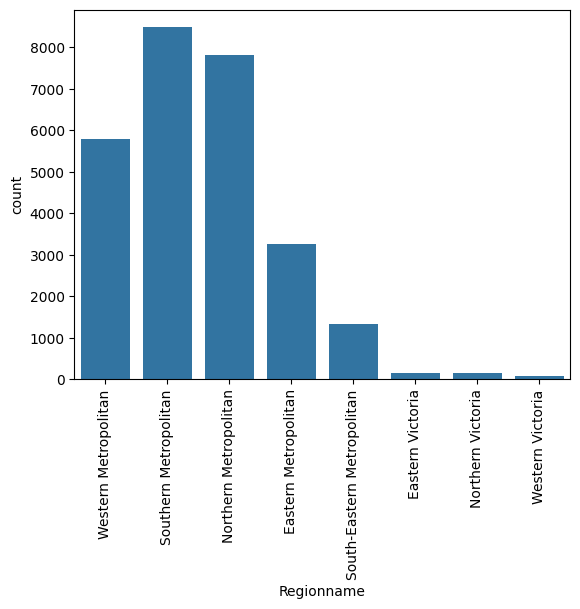

In [30]:
sns.countplot(data=data,x='Regionname')
plt.xticks(rotation=90)
plt.show()

* Eastern, Northern, and Western Victoria have very less number of properties.
* Southern and Northern Metropolitan have the most number of properties.

### Bivariate Analysis

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27103 entries, 0 to 27102
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27103 non-null  object        
 1   Rooms          27103 non-null  int64         
 2   Type           27103 non-null  object        
 3   SellerG        27103 non-null  object        
 4   Date           27103 non-null  datetime64[ns]
 5   Distance       27102 non-null  float64       
 6   Postcode       27102 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27103 non-null  object        
 14  Propertycount  27103 non-null  int64         
 15  Price          2710

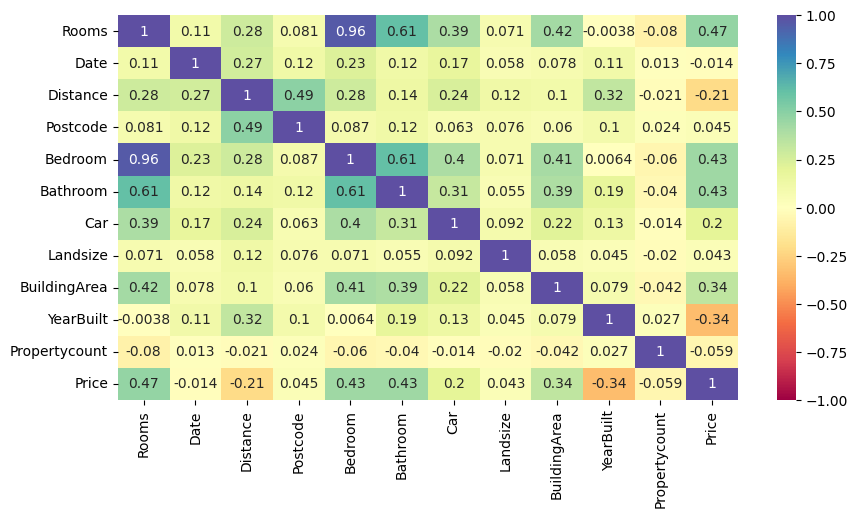

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(data.select_dtypes(exclude='object').corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

* Price column shows a high correlation with number of rooms, bedrooms, bathrooms and car parking spaces. This indicates that more the number of rooms, bedrooms, etc more will be the selling price of a property.
* Price has a negative correlation with Distance column. This indicates as the distance increases the selling price of a property will decrease.
* Price has a negative correlation with YearBuilt column. This indicates that vintage properties have higher selling price as compared to properties built recently.
* Rooms, Bedrooms, and Bathrooms show a high correlation with each other which is expected.
* BuildingArea and Landsize shows a positive correlation which makes sense as if the land size is more the building area will also be more.
* We should not consider the correlation value with Postcode because this column is a unique identifier for an area, and an increase or decrease in postcode can not impact any other feature.

**Properties which have more space for living or more number of rooms, bedrooms and bathrooms generally tend to have higher selling prices. Let's analyze the relationship between the price and total number of rooms in a property**

In [36]:
# Creating a column with a sum of number of rooms, bedrooms, bathrooms, and car parking spaces
data['Total Space'] = data['Rooms'] + data['Bedroom'] + data['Bathroom'] + data['Car']
data.head()


,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,9.0
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,5.0
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0


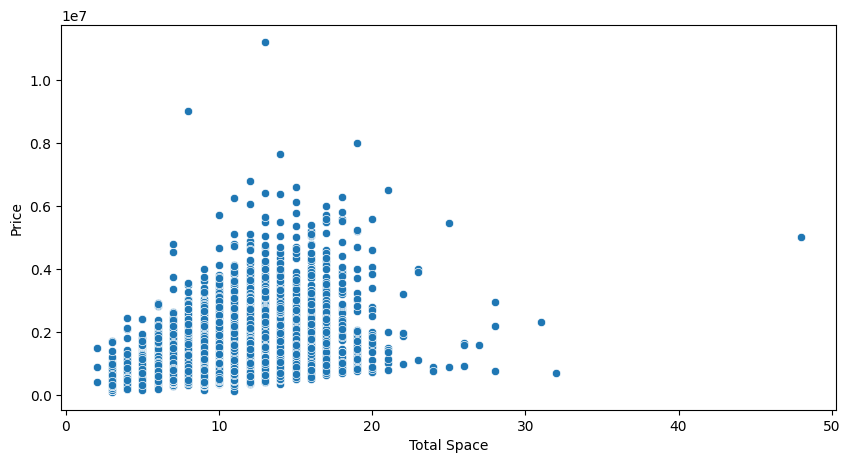

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x='Total Space',y='Price')
plt.show()

* We can see an increasing trend of selling price with total space. Let's visualize the trend using lmplot().

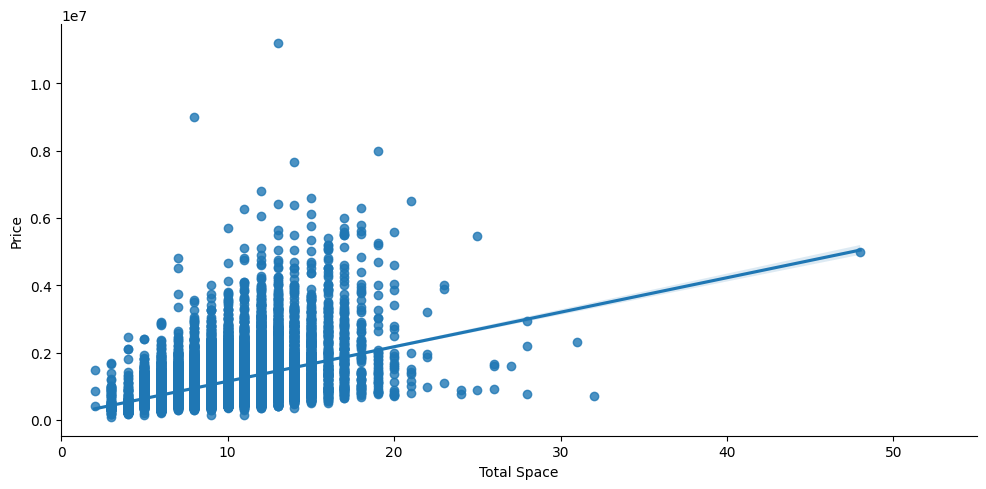

In [38]:
sns.lmplot(data=data,x='Total Space',y='Price',height=5,aspect=2)
plt.xlim(0,55)
plt.show()

* A positive correlation or an increasing trend can be clearly observed between the total number of rooms and the selling price of the property, although the line plotted by lmlot() doesn't show a high correlation. Let's check the correlation value further.
* The positive correlation indicates that more living space implies a higher selling price.

In [39]:
# checking the correlation between Total space and Price
data[['Total Space','Price']].corr()

,Total Space,Price
Total Space,1.000000,0.458282
Price,0.458282,1.000000


* As expected, there is a positive correlation between Total Space and Price but it is not very high.

**The distance of the property from the key facilities play a cruicial role in deciding the selling price of a property. The properties located closer to key facilities tend to be priced higher and vice versa. Let's find out if the same relationship exists in our data**

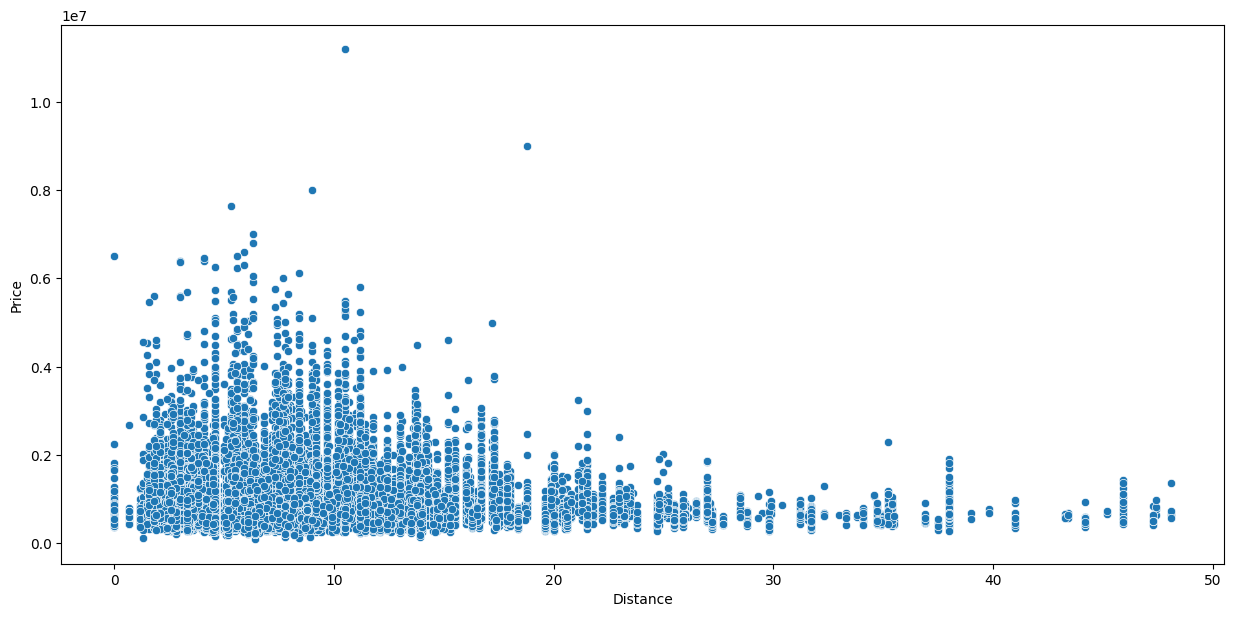

In [40]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=data, x='Distance', y ='Price')
plt.show()

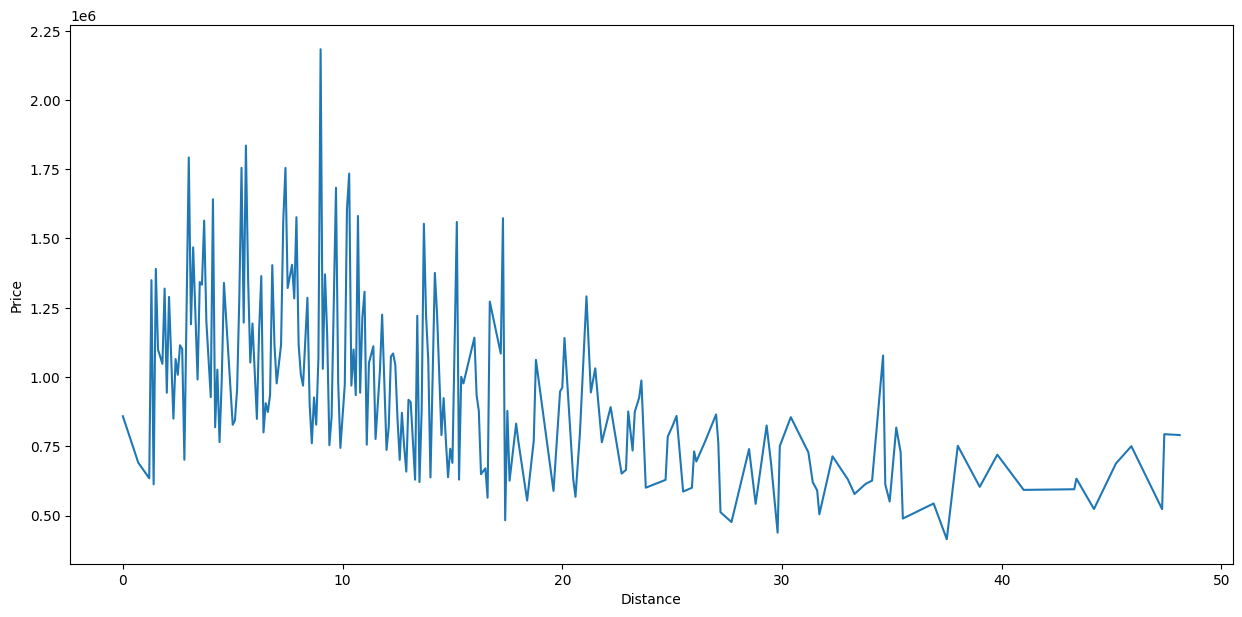

In [41]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data, x='Distance', y ='Price',ci=None)
plt.show()

* We observe that after 20-25 Kms the selling price of the properties starts decreasing which indicates that distance plays a key role in deciding the selling price of a property.
* Let's create bins/buckets for the Distance column to get better visualization of the relationship between Price and Distance.

**Creating bins for distance column**
* 0 - 15  KMs  - The property will be said to be in **`Nearby`** location.
* 15 - 30 KMs - The property will be said to be in **`Moderately Close`** location.
* 30 - 50 KMs - The property will be said to be in **`Far`** away location.

In [42]:
# using pd.cut() function to create bins
data['Distance_bins'] = pd.cut(data['Distance'],bins=[0,15,30,50],labels=['Nearby','Moderately Close','Far'], right = False)

In [43]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space,Distance_bins
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,9.0,Nearby
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,5.0,Nearby
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0,Nearby
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0,Nearby


**Let's check the price with the distance bins**

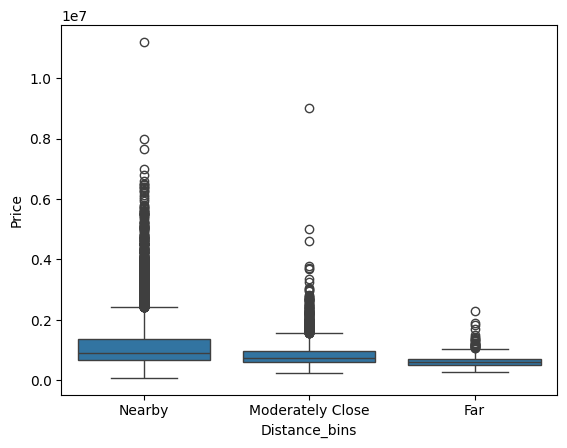

In [44]:
sns.boxplot(data=data,x='Distance_bins',y='Price')
plt.show()

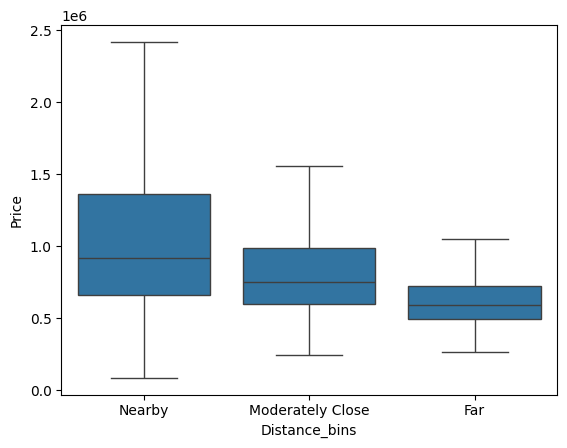

In [45]:
sns.boxplot(data=data,x='Distance_bins',y='Price',showfliers=False)
plt.show()

* We can see that as the distance increases the selling price of the property decreases.
* The properties closer to CBD have a high variance in the selling price. This variance in price decreases with the increase in distance.
* Considering that a customer has planned the budget for buying a property as the 'median' selling price for nearby, moderately close, and far away properties.

  This variation in the selling price of a property might impact the planned budget of the customer who is looking to buy a property near CBD (as the variance is high). The customer might be able to get the property within the planned budget for properties that are far from CBD.


**As we observed in the correlation plot there is a negative correlation between the selling price of a property and the year it was built. Let's analyze it further**

In [46]:
# Calculating the age of a property from the year it was built in to see how the prices vary with it
year_at_sale = data['Date'].dt.year
year_at_sale

,Date
0,2016
1,2016
2,2016
3,2016
4,2016
...,...
27098,2017
27099,2017
27100,2017
27101,2017


In [47]:
np.max(year_at_sale)

2018

In [48]:
data['AgeofProp'] = year_at_sale - data['YearBuilt']
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space,Distance_bins,AgeofProp
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,9.0,Nearby,0.0
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,5.0,Nearby,116.0
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0,Nearby,NaN
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby,86.0
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0,Nearby,3.0


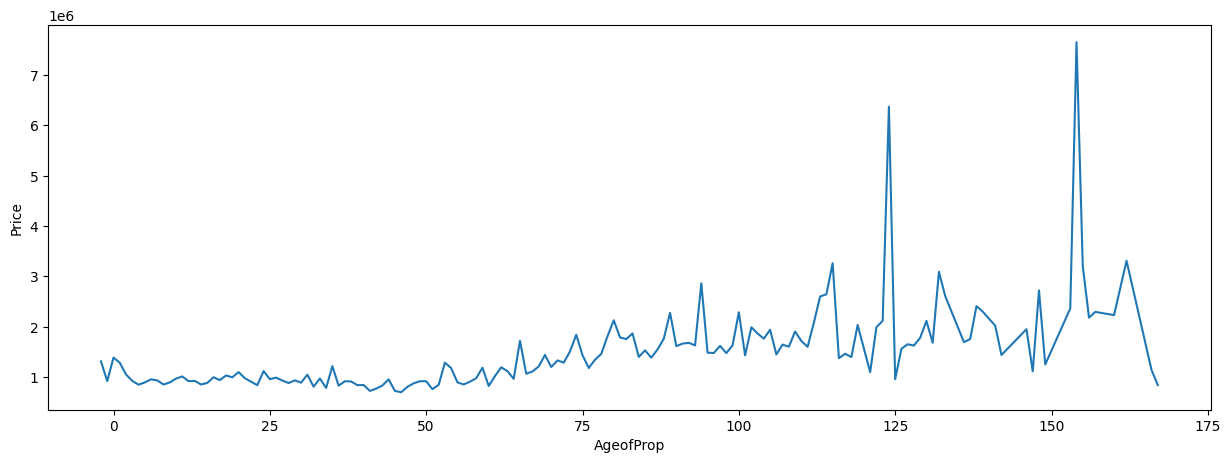

In [50]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='AgeofProp',y='Price',ci=None)
plt.show()

* We observe an increasing trend indicating the properties which are older (vintage properties) have higher selling prices.
* The customers who wish to live in vintage properties might have to spend more money.

**The price of properties vary based on the type of the property. For example, a villa may be priced higher than a duplex because of more amenities. Let's see which type of property is priced higher.**

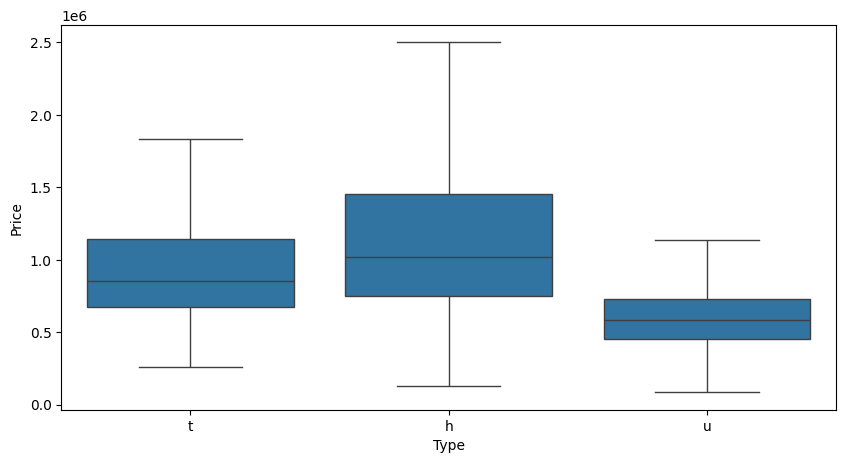

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='Type',y='Price',showfliers=False)
plt.show()

* The properties like villa, cottage, etc have a higher median price as compared to a townhouse and a duplex.
* The townhouses have a higher median price than unit, duplex properties.
* Customers planning to buy 'h' type property might have to invest more.

**Similarly the region of the property will play an integral role in deciding the selling price. Let' do a similar analysis with regions as well**

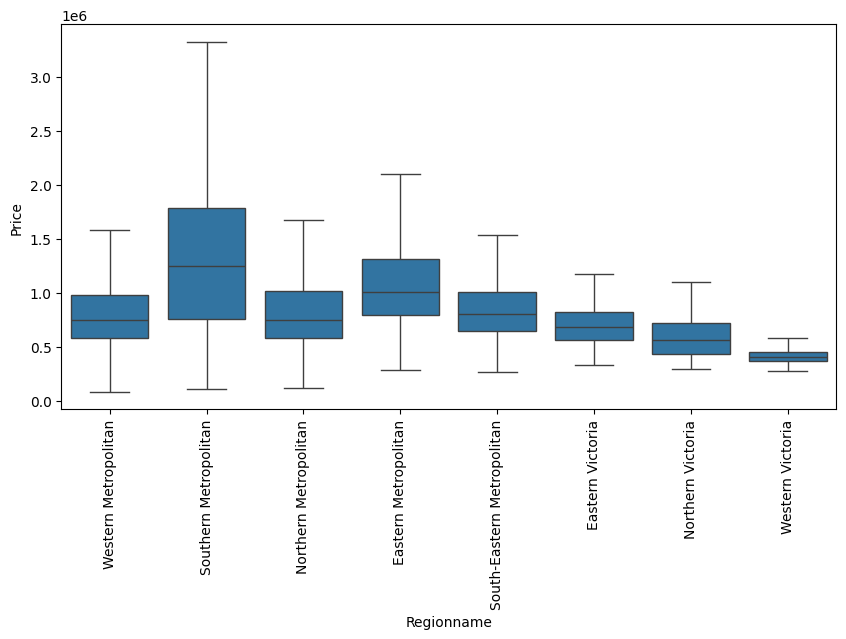

In [52]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='Regionname',y='Price',showfliers=False)
plt.xticks(rotation=90)
plt.show()

* In Metropolitan, the southern and eastern regions have the costliest properties while the northern and western properties are priced similarly.

* In Victoria, western having the lowest priced properties while northern has moderately priced properties, and eastern region having high priced properties.

#### Missing value treatment

In [53]:
# selecting the instances where missing value is greater than 0
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Distance,1,0.003690
Postcode,1,0.003690
Bedroom,6425,23.705863
Bathroom,6431,23.728001
Car,6806,25.111611
Landsize,9230,34.055271
BuildingArea,16574,61.151902
YearBuilt,15118,55.779803
Total Space,6806,25.111611
Distance_bins,1,0.003690


* BuildingArea and YearBuilt columns have the highest percentage of missing values.
* Distance and Postcode have the least number of missing values.
* Bedroom, Bathroom, and Car have almost equal percentage of missing values.
* AgeofProp and Total Space has equal percentage of missing values as YearBuilt and Bedroom, Bathroom, and Car because the information here were extracted using these columns.
* Landsize has around 34% missing values.

**Distance column**

In [ ]:
# extracting all the information of other variables where Distance is null
data.loc[data['Distance'].isnull()==True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space,Distance_bins,AgeofProp
9590,Fawkner Lot,3,h,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN,NaN


* We observe that the data is missing for other attributes as well.
* Let's see if we can find more information using the name of the Suburb.

In [54]:
data.loc[data['Suburb']=='Fawkner Lot']

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space,Distance_bins,AgeofProp
9590,Fawkner Lot,3,h,Brad,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN,NaN


* We see that there is only one data entry for the Fawkner Lot suburb and in this case it is possible that data for this suburb was not collected. This shows that data is not missing randomly rather has pattern in missingness.
* Imputing the Distance as well other information will not be a suitable approach as the imputed values will not be reliable. Hence, we will drop this row.

In [55]:
# dropping the row
data = data.drop(9590).reset_index(drop=True)

In [56]:
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Bedroom,6424,23.703048
Bathroom,6430,23.725186
Car,6805,25.108848
Landsize,9229,34.052837
BuildingArea,16573,61.150469
YearBuilt,15117,55.778171
Total Space,6805,25.108848
AgeofProp,15117,55.778171


In [ ]:
# extracting all the information of other variable where Bedroom is null
data.loc[data['Bedroom'].isnull()==True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space,Distance_bins,AgeofProp
8,Altona North,4,h,hockingstuart,2016-03-09,11.100,3025.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,5132,857500,NaN,Nearby,NaN
12,Ashburton,2,h,Marshall,2016-03-09,11.000,3147.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,3052,1820000,NaN,Nearby,NaN
14,Avondale Heights,4,h,Jellis,2016-03-09,10.500,3034.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,4502,1310000,NaN,Nearby,NaN
25,Balwyn North,4,u,hockingstuart,2016-03-09,9.200,3104.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1450000,NaN,Nearby,NaN
26,Balwyn North,2,h,Fletchers,2016-03-09,9.200,3104.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1305000,NaN,Nearby,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,Footscray,2,u,McGrath,2017-09-30,5.100,3011.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,7570,455500,NaN,Nearby,NaN
27089,Forest Hill,2,h,Fletchers,2017-09-30,15.400,3131.000,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,4385,762000,NaN,Moderately Close,NaN
27090,Glen Waverley,3,u,Ray,2017-09-30,16.700,3150.000,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,15321,1100000,NaN,Moderately Close,NaN
27093,Kingsbury,2,t,RW,2017-09-30,12.100,3083.000,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,1414,512000,NaN,Nearby,NaN


* It looks like wherever Bedroom is null the data points in other columns are also missing. Let's check this.

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Bathroom'].value_counts(dropna=False)

NaN    6424
Name: Bathroom, dtype: int64

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Car'].value_counts(dropna=False)

NaN    6424
Name: Car, dtype: int64

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Landsize'].value_counts(dropna=False)

NaN        6418
594.000       1
446.000       1
338.000       1
250.000       1
549.000       1
239.000       1
Name: Landsize, dtype: int64

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'BuildingArea'].value_counts(dropna=False)

NaN    6424
Name: BuildingArea, dtype: int64

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'YearBuilt'].value_counts(dropna=False)

NaN    6424
Name: YearBuilt, dtype: int64

* There seems to be a strong pattern in missing values, as wherever the Bedroom column has missing data the other columns like Bathroom, Car, Landsize, BuildingArea, and YearBuilt also have missing values.
* Let's see if the missing data has some pattern in suburbs, and regions of properties.

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Suburb'].value_counts(dropna=False)

Reservoir          236
Bentleigh East     144
St Kilda           116
Glenroy            116
Richmond           111
                  ... 
Cranbourne East      1
Melton West          1
New Gisborne         1
Scoresby             1
Plenty               1
Name: Suburb, Length: 307, dtype: int64

In [ ]:
# finding the total number of unique values in a suburb
data['Suburb'].nunique()

344

* Across 344 suburbs the missing values are present in 307 suburbs, indicating that the most suburbs have missing values.
* There seems to be no pattern of missing values with respect to suburb column.

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Regionname'].value_counts(dropna=False)

Southern Metropolitan         2197
Northern Metropolitan         1912
Western Metropolitan          1212
Eastern Metropolitan           728
South-Eastern Metropolitan     317
Eastern Victoria                26
Northern Victoria               25
Western Victoria                 7
Name: Regionname, dtype: int64

* Similar to suburbs there seems to be no notable pattern across different regions.

**Missing value treatment for Bedroom, Bathroom, and Car columns**

* One of the approaches to treat the missing values of these columns would be to group the data on the basis of Region and Type of the property to get a better idea of the average number of bedrooms, bathrooms, and car parking spaces.
* It is more likely that a property of certain type in a given region would have similar number of bedrooms, bathrooms, and car parking spaces.

In [ ]:
# checking the average number of bedrooms, bathrooms, and car parking spaces in a region
data.groupby(['Regionname','Type'])[['Bedroom','Bathroom','Car']].mean()

Bedroom  Bathroom   Car
Regionname                 Type                         
Eastern Metropolitan       h       3.552     1.807 1.946
                           t       3.032     1.853 1.673
                           u       2.357     1.263 1.290
Eastern Victoria           h       3.560     1.881 2.098
                           u       2.667     1.000 1.333
Northern Metropolitan      h       3.106     1.468 1.685
                           t       2.567     1.620 1.362
                           u       1.878     1.160 1.093
Northern Victoria          h       3.496     1.892 2.146
                           u       3.000     2.000 2.000
South-Eastern Metropolitan h       3.476     1.713 2.094
                           t       2.887     1.849 1.679
                           u       2.260     1.205 1.342
Southern Metropolitan      h       3.383     1.840 1.883
                           t       3.024     2.012 1.780
                           u       1.939     1.191 1.135
Western Metropolitan       h       3.244     1.576 1.907
                           t       2.880     1.851 1.538
                           u       2.106     1.192 1.144
Western Victoria           h       3.379     1.448 2.060

* We have received the mean number of Bedrooms, Bathrooms, and Car parking spaces for each type of property in a specific region.

In [57]:
# imputing missing values in Bedroom column
data['Bedroom'] = data['Bedroom'].fillna(value = data.groupby(['Regionname','Type'])['Bedroom'].transform('mean'))

In [58]:
# imputing missing values in Bathroom column
data['Bathroom'] = data['Bathroom'].fillna(value = data.groupby(['Regionname','Type'])['Bathroom'].transform('mean'))

In [59]:
# imputing missing values in Car column
data['Car'] = data['Car'].fillna(value = data.groupby(['Regionname','Type'])['Car'].transform('mean'))

In [60]:
# checking if all the missing values were imputed in Bedroom, Bathroom, and Car columns
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Landsize,9229,34.052837
BuildingArea,16573,61.150469
YearBuilt,15117,55.778171
Total Space,6805,25.108848
AgeofProp,15117,55.778171


In [62]:
# converting all the values of Bedroom, Bathroom, and Car to integer type
data['Bedroom'] = data['Bedroom'].astype(int)
data['Bathroom'] = data['Bathroom'].astype(int)
data['Car'] = data['Car'].astype(int)

**Missing values of Total Space column**

We can create this feature again from the combination of Rooms, Bedroom, Bathroom, and Car as the missing values have now been imputed.

In [63]:
# removing Total Space column
data.drop('Total Space',axis=1,inplace=True)

# creating new Total Space column
data['Total_Space_New'] = data['Rooms'] + data['Bedroom'] + data['Bathroom'] + data['Car']
data['Total_Space_New'] = data['Total_Space_New'].astype(int)

**Relationship of Total Space column with Price once again**

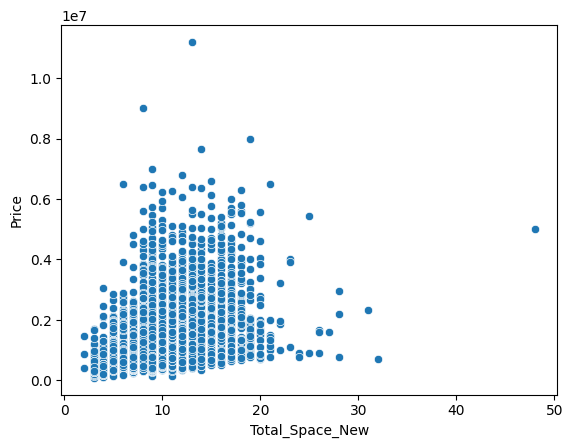

In [64]:
sns.scatterplot(data=data,x='Total_Space_New',y='Price')
plt.show()

* We observe that the relationship between Total Space and Price has not changed and the positive relation between these variables is still maintained.

**Missing value Treatment for Landsize**

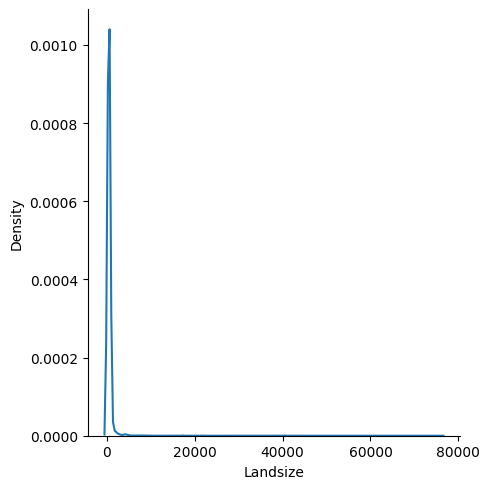

In [65]:
sns.displot(data=data,x='Landsize',kind='kde')
plt.show()

* As Landsize column is skewed, using average value for imputation might not be the correct method as mean gets impacted by outliers. So we will use median value to impute the missing values of this column as median is not affected by the outliers.

In [66]:
data.groupby(['Regionname','Type'])[['Landsize']].median()

Landsize
Regionname                 Type          
Eastern Metropolitan       h        693.5
                           t        236.0
                           u        208.0
Eastern Victoria           h        840.0
                           u        230.0
Northern Metropolitan      h        482.0
                           t        145.0
                           u         50.0
Northern Victoria          h        737.5
                           u        315.0
South-Eastern Metropolitan h        632.0
                           t        248.0
                           u        210.0
Southern Metropolitan      h        593.0
                           t        267.0
                           u         50.0
Western Metropolitan       h        537.0
                           t        200.0
                           u         80.0
Western Victoria           h        603.0

In [67]:
# finding the median of landsize for each group and imputing the missing data with it
data['Landsize'] = data['Landsize'].fillna(value = data.groupby(['Regionname','Type'])['Landsize'].transform('median'))

In [68]:
# checking if all the missing values were imputed in Landsize column
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
BuildingArea,16573,61.150469
YearBuilt,15117,55.778171
AgeofProp,15117,55.778171


**Missing value treatment for BuildingArea, YearBuilt, and AgeofProp**

- we will be dropping these columns as the missing values are more than 50% of the total data

In [ ]:
# dropping columns BuildingArea, YearBuilt, and AgeofProp from the data frame
data = data.drop(['BuildingArea','YearBuilt','AgeofProp'],axis=1)

In [69]:
# saving the dataset with all the missing values treated
data.to_csv('Melbourne_Housing_NoMissing.csv',index=False)

### Outlier Detection and Treatment

**Visualize all the outliers present in data together**

In [70]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Distance_bins,AgeofProp,Total_Space_New
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3,2,1,303.0,225.0,2016.0,Western Metropolitan,3464,840000,Nearby,0.0,9
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2,1,0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,Nearby,116.0,5
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2,1,0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,Nearby,NaN,5
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3,2,4,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,Nearby,86.0,13
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3,2,2,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,Nearby,3.0,10


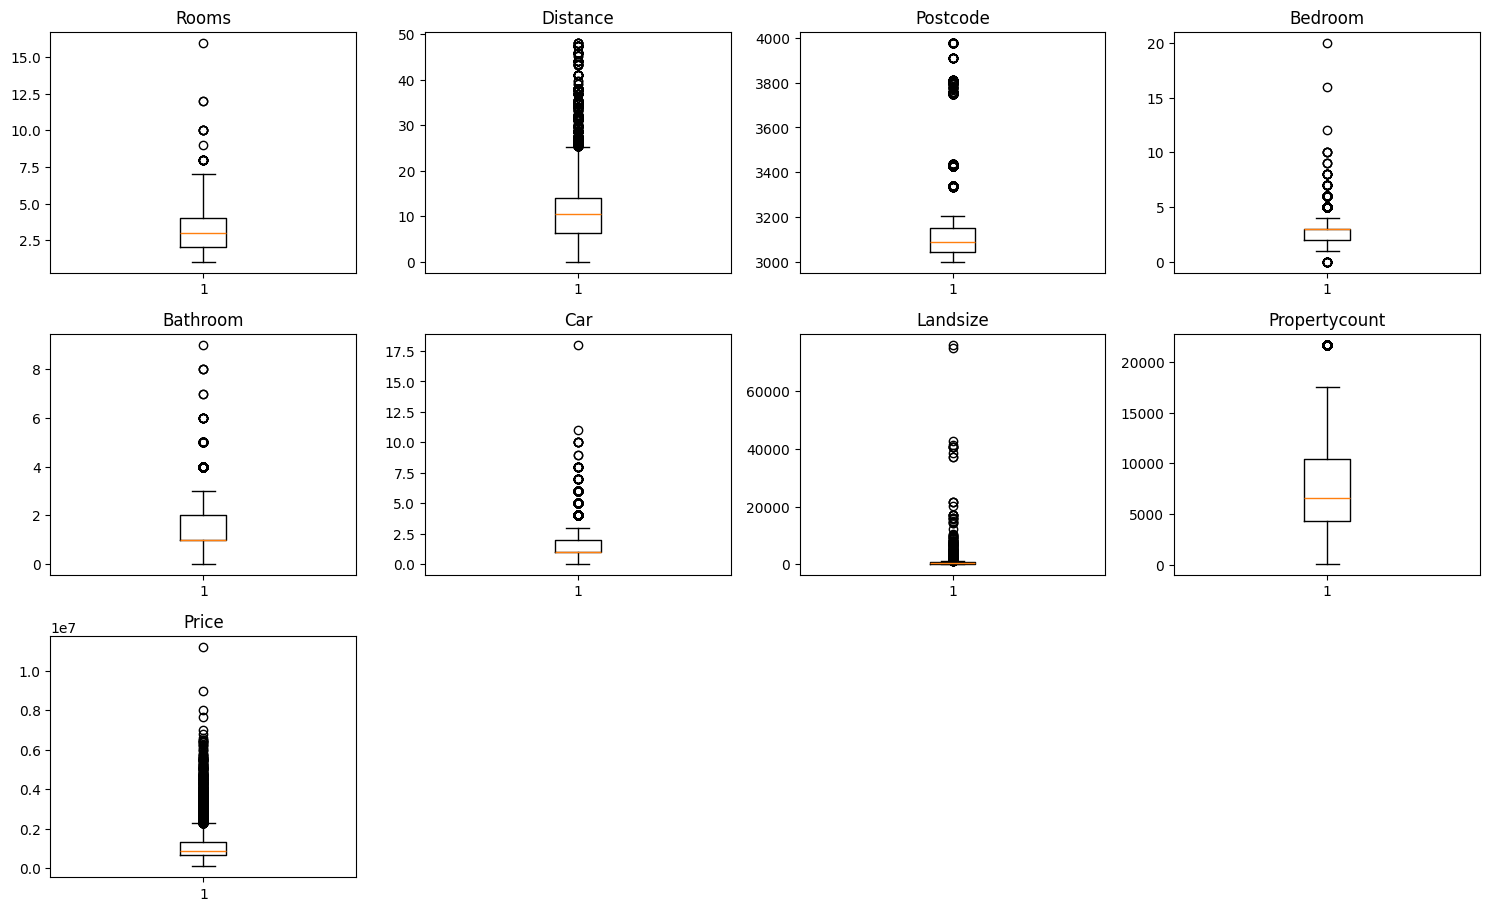

In [71]:
# selecting the numerical columns of data and adding their names in a list
numeric_columns = ['Rooms', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car','Landsize',
                   'Propertycount', 'Price']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

 * Rooms, Bedroom, Bathroom, Car - The values which are being represented as outliers in the above boxplot may not seem realistic in some cases. For example- It is not common to have more than 15 rooms, 15 bedrooms, and more than 10 car parking spaces in a general scenario.

Although these values can not be considered to be unrealistic but we will rarely see such high number of rooms, bedrooms, bathrooms and car parking in a property. So, we will treat the outliers in this column.
  
  
 * Distance - The outliers in this column can be considered as genuine values because a property can be at varying distances from the C.B.D. In the context of this problem we will not consider these values as outliers.


 * Postcode - Postcodes are a combination of several numerical values based on region, sub-region, etc and these cannot be considered as outliers.



 * Landsize - The values in this column seem unrealistic as some of the properties have a Land size greater than 0.1 Sq Kms. So, we will treat the outliers in this column.



 * Propertycount- Each suburb can have varying number of properties depending upon the region and the area of a suburb. Hence, the count of properties in a suburb can be considered as genuine values and not outliers.



 * Price - The selling price of properties depends upon various factors (for example location of a property) and the prices can change from time to time. Hence, the selling price of properties can be considered as genuine values and not outliers.

**Finding the percentage of outliers, in each column of the data, using IQR.**

In [73]:
# Finding the 25th percentile and 75th percentile for the numerical columns.
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR

In [74]:
# Percentage of outliers in each column
((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker)).sum()/data.shape[0]*100

,0
Rooms,0.084865
Distance,4.342853
Postcode,2.911224
Bedroom,4.195262
Bathroom,0.870784
Car,4.305955
Landsize,1.741569
Propertycount,2.671390
Price,4.660173


**Creating a function to floor and cap/clip outliers in a column**

In [75]:
# defining the function to treat outliers using IQR method
def treat_outliers(df, col):

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

**Treating outliers in Rooms column**

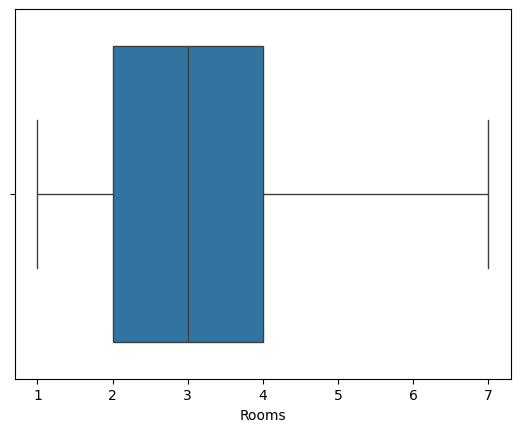

In [76]:
data = treat_outliers(data,'Rooms')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='Rooms')
plt.show()

* The maximum number of rooms in a property have been capped to 7. All the values greater than 7 (whisker value) have been treated.

In [77]:
# treating outliers of Bedroom column
data = treat_outliers(data,'Bedroom')

# treating outliers of Car column
data = treat_outliers(data,'Car')

# treating outliers of Bathroom column
data = treat_outliers(data,'Bathroom')

# treating outliers of Landsize column
data = treat_outliers(data,'Landsize')

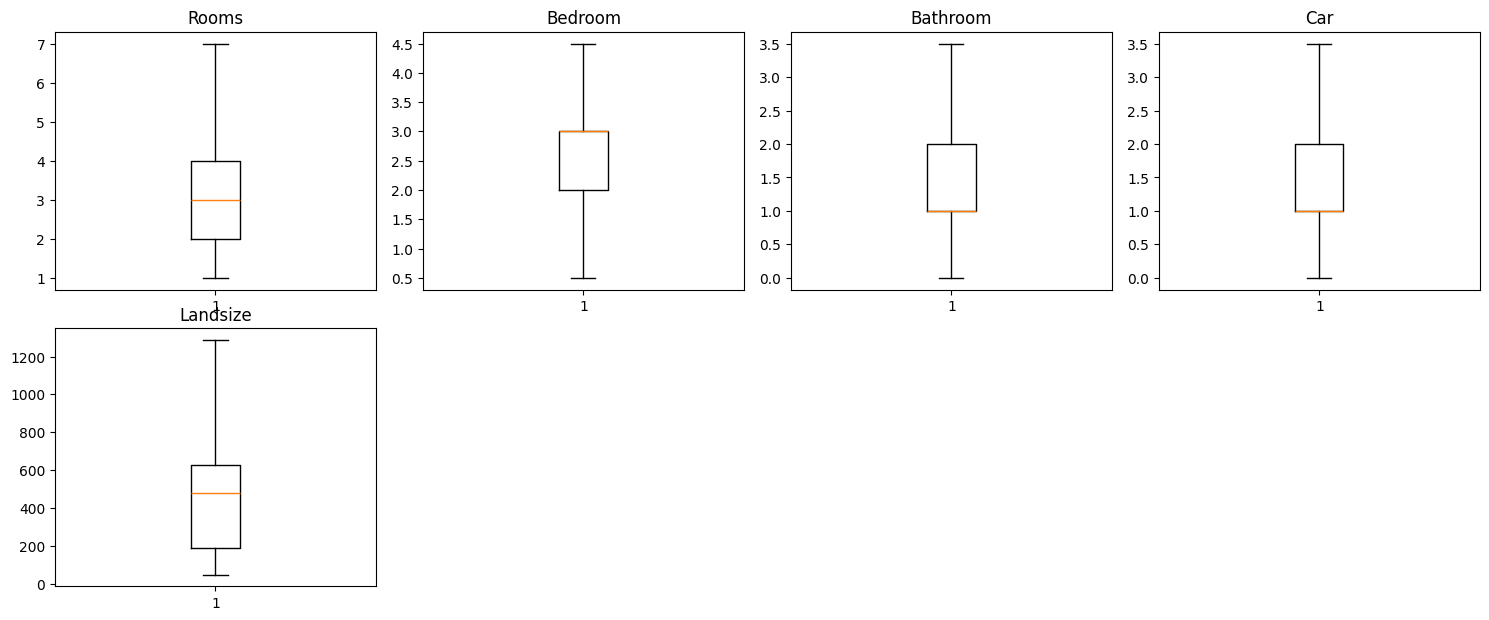

In [78]:
# selecting the numerical columns where outliers were treated
numeric_columns = ['Rooms', 'Bedroom', 'Bathroom', 'Car','Landsize']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All the outliers have been treated.
* We observe that the data type of Bedroom, Bathroom, and Car has changed to float which we should change to the integer type.
* We can also see that the distribution of Landsize column doesn't look heavily right-skewed now.

In [79]:
data['Bedroom'] = data['Bedroom'].astype(int)
data['Bathroom'] = data['Bathroom'].astype(int)
data['Car'] = data['Car'].astype(int)

In [80]:
# saving the dataset with all the outlier values treated
data.to_csv('Melbourne_Housing_NoOutliers.csv',index=False)